In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import LinearLocator
import pandas as pd
import lib

In [11]:
df = pd.DataFrame(columns=["optimizer","batch","y","h"], data=[
    ["Adam",1,71,61],
    ["Adam",2,77,68],
    ["Adam",4,89,81],
    ["Adam",8,111,106],
    ["Adam",16,136,159],
    ["Adam",32,275,211],
    ["SGD",1,65,57],
    ["SGD",2,72,63],
    ["SGD",4,84,75],
    ["SGD",8,105,96],
    ["SGD",16,130,146],
    ["SGD",32,204,247]                                        
                                                              ])
df[["y","h"]] = df[["y","h"]].astype(float)
print df.head()                  

  optimizer  batch      y      h
0      Adam      1   71.0   61.0
1      Adam      2   77.0   68.0
2      Adam      4   89.0   81.0
3      Adam      8  111.0  106.0
4      Adam     16  136.0  159.0


In [12]:
def mape(s):
    y = s["y"]
    h = s["h"]
    err = lib.lib.MAPE(y,h)
    return err
    
df["MAPE"] = df.apply(mape,axis=1)
df.head()
        

,optimizer,batch,y,h,MAPE
0,Adam,1,71.0,61.0,14.084507
1,Adam,2,77.0,68.0,11.688312
2,Adam,4,89.0,81.0,8.988764
3,Adam,8,111.0,106.0,4.504505
4,Adam,16,136.0,159.0,16.911765


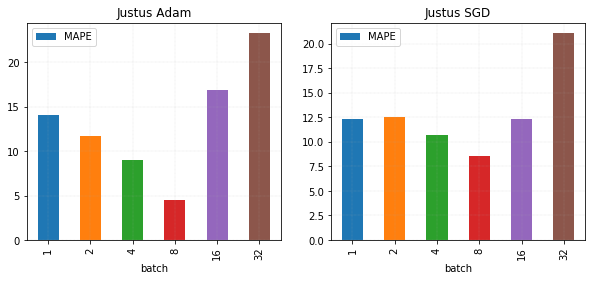

In [21]:
fig,axs = plt.subplots(1,2, figsize=(10,4))
i = 0
for optimizer, df_ in df.groupby(by="optimizer"):
    ax = axs[i]
    i += 1
    df_.plot.bar("batch","MAPE", ax=ax)
    ax.set_title("Justus {}".format(optimizer))
    ax.grid(ls=":",lw=0.3)